### Task 1A - Predicting house prices in Ames, Iowa
- In this task, you will forecast the sale price of residential property in Ames, a city in Iowa, using a simple linear model. To do so, you have the prices of the last sale of residential property in Ames, Iowa from 2006 to 2010, and a large number of variables describing very precisely every property. The data you will use for estimation is on Moodle (train.csv).
- Information about the data : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
install.packages("dplyr")
library("dplyr")
install.packages("ggplot2")
library(ggplot2)


The downloaded binary packages are in
	/var/folders/42/_9ggpw4n053b2nv3lwxvlq7m0000gn/T//RtmpbLkAOO/downloaded_packages


Warning message:
“package ‘dplyr’ was built under R version 3.5.1”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The downloaded binary packages are in
	/var/folders/42/_9ggpw4n053b2nv3lwxvlq7m0000gn/T//RtmpbLkAOO/downloaded_packages


#### Step 1 : Import the data in R in a data.frame (or similar) format

In [2]:
house_prices = read.csv("./train.csv")

#### Step 2 : What is the number of observations? What is the dependant variable? How many explanatory variables can you include?

In [3]:
head(house_prices)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
# number of observations

nrow(house_prices)

[1] 1460

- The dependent variable is the Sale Price

How many explanatory variables can you include??

#### Step 3 : Is your dependent variable continuous or categorical - conceptually? What is its class in R? Is this a regression or a classification problem?

Conceptually, the dependent variable is continuous- it's a price and so can be any finite positive number

In [5]:
# What's it's class in R?

sale_prices <- house_prices$SalePrice

typeof(sale_prices[1])

[1] "integer"

In R the class of the sale prices is integer

(Add a comment about how this isn't really continuous?)

This is a regression problem: we want to predict the house prices, rather than classify the houses

#### Step 4 : Name two continuous explanatory variables in your data? Explain what they are. Are they stored as numeric in R?

#### Step 5: Summarize the numeric variables in your data set in a nice table.

In [6]:
nicetable <- dplyr::select_if(house_prices, is.numeric)

In [7]:
head(nicetable)

Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1,60,65,8450,7,5,2003,2003,196,706,⋯,0,61,0,0,0,0,0,2,2008,208500
2,20,80,9600,6,8,1976,1976,0,978,⋯,298,0,0,0,0,0,0,5,2007,181500
3,60,68,11250,7,5,2001,2002,162,486,⋯,0,42,0,0,0,0,0,9,2008,223500
4,70,60,9550,7,5,1915,1970,0,216,⋯,0,35,272,0,0,0,0,2,2006,140000
5,60,84,14260,8,5,2000,2000,350,655,⋯,192,84,0,0,0,0,0,12,2008,250000
6,50,85,14115,5,5,1993,1995,0,732,⋯,40,30,0,320,0,0,700,10,2009,143000


#### Step 6 : Plot the histogram of the numeric variables that you deem to be interesting. (At least 3.) Show me the plots in your pdf.

Why these 3 Enzo??

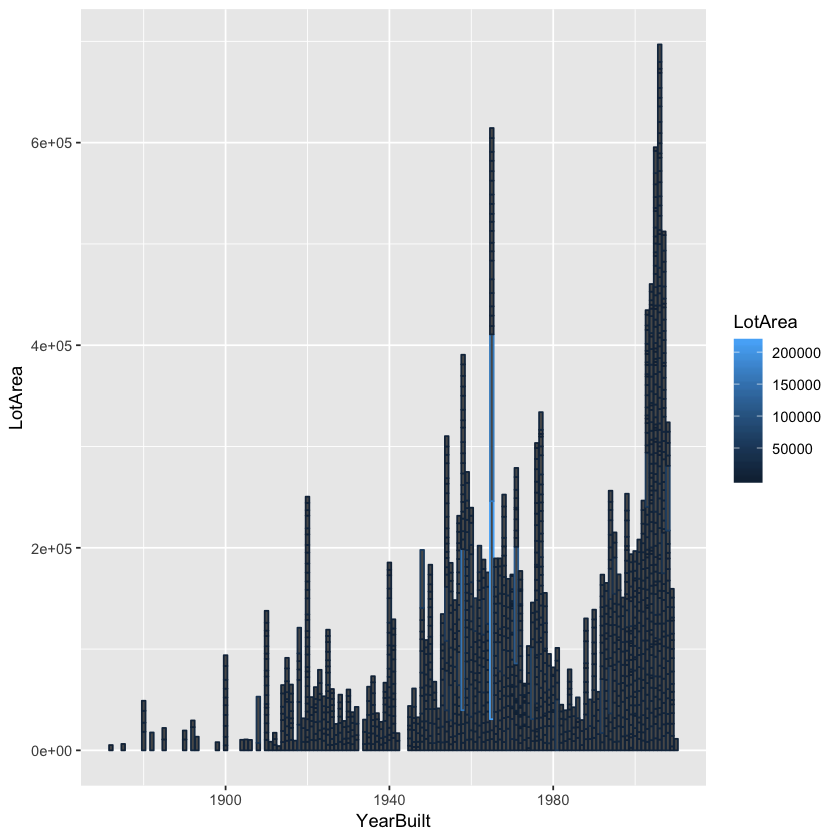

In [8]:
ggplot(data=nicetable) + geom_col(mapping = aes(x=YearBuilt, y= LotArea, colour = LotArea))

Warning message:
“Removed 259 rows containing missing values (position_stack).”

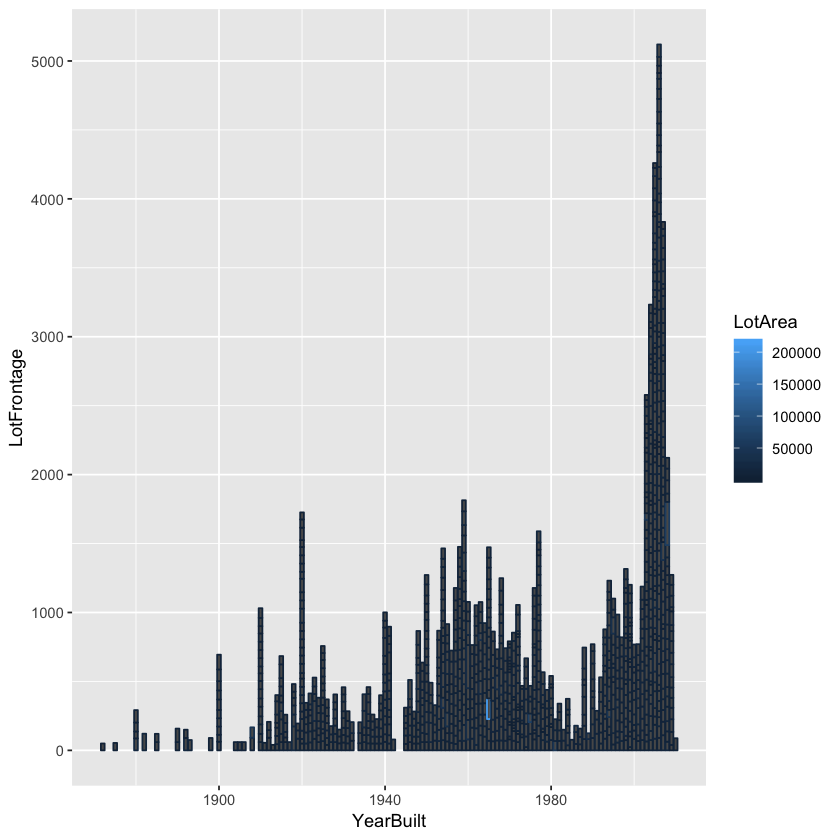

In [9]:
ggplot(data=nicetable) + geom_col(mapping = aes(x=YearBuilt, y= LotFrontage, colour = LotArea))

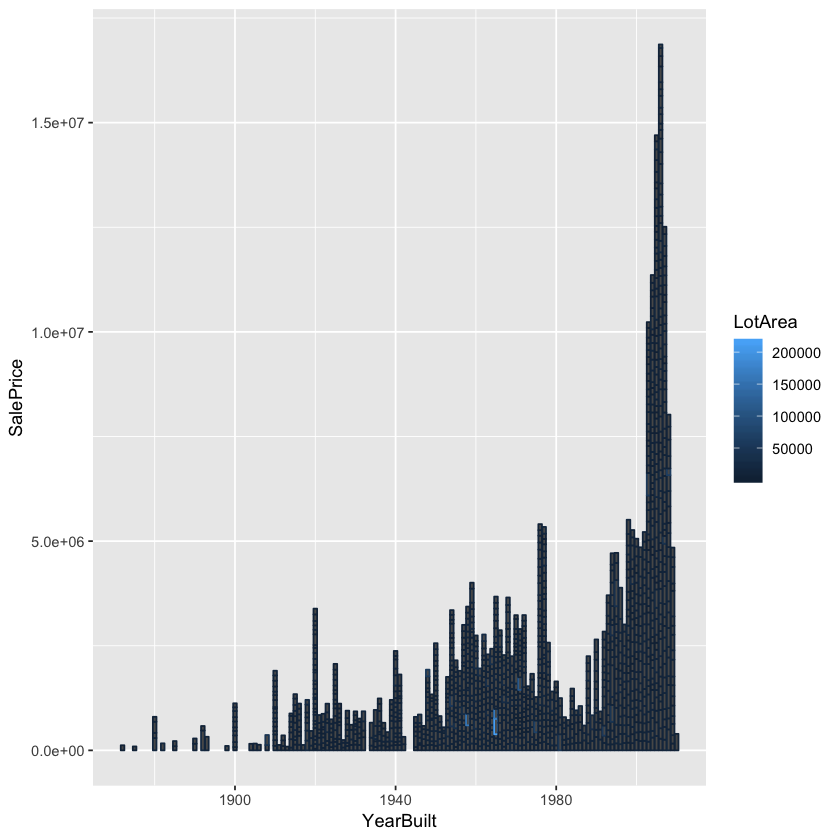

In [10]:
ggplot(data=nicetable) + geom_col(mapping = aes(x=YearBuilt, y= SalePrice, colour = LotArea))

#### Step 7 : Are there any missing data? Compute the number of missing observations per variable. How do you solve this problem?

In [11]:
#nicetable
colSums(is.na(nicetable))

Id    MSSubClass   LotFrontage       LotArea   OverallQual 
            0             0           259             0             0 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1 
            0             0             0             8             0 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     X1stFlrSF     X2ndFlrSF 
            0             0             0             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces 
            0             0             0             0             0 
  GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF 
           81             0             0             0             0 
EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea       MiscVal 
            0             0             0             0             0 
       MoSold        YrSold     SalePrice 
            0             0             0

In [12]:
sum(is.na(nicetable))
sapply(nicetable, function(x) sum(is.na(x)))

[1] 348

Id    MSSubClass   LotFrontage       LotArea   OverallQual 
            0             0           259             0             0 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1 
            0             0             0             8             0 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     X1stFlrSF     X2ndFlrSF 
            0             0             0             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces 
            0             0             0             0             0 
  GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF 
           81             0             0             0             0 
EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea       MiscVal 
            0             0             0             0             0 
       MoSold        YrSold     SalePrice 
            0             0             0

In [13]:
#train
colSums(is.na(house_prices))

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [14]:
sum(is.na(house_prices))
sapply(house_prices, function(x) sum(is.na(x)))

[1] 6965

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

#### Step 8 : How many duplicate observations are there in the dataset? Remove any duplicates.

In [15]:
duplicated(nicetable)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [16]:
nt1 <- unique(nicetable)

In [17]:
nrow(nt1)
nrow(nicetable)
ncol(nt1)
ncol(nicetable)

[1] 1460

[1] 1460

[1] 38

[1] 38

In [18]:
nt1 <- dplyr::distinct(nicetable)
nrow(nt1)
nrow(nicetable)
ncol(nt1)
ncol(nicetable)

[1] 1460

[1] 1460

[1] 38

[1] 38

In [19]:
duplicated(house_prices)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

There are no duplicates in either table???

In [21]:
# View(dplyr::distinct(house_prices))

#### Step 9 : Convert all character variables to factors

In [22]:
str(house_prices)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

It looks like there aren't any character values to convert!


#### Step 10 : Estimate a linear model including all the variables. 

- Eliminate iteratively the least important variables to get to the most parsimonious yet predictive model. 
- Explain your procedure and interpret the results. 


- NOTE 1 : You should have an R2 of at least 70%. 
- NOTE 2 : Do not use interaction terms. You can use powers and transformations (square, logs, etc...) of a feature/explanatory variable, but no interactions.

In [36]:
df = data.frame(y = 1:10, x1 = runif(10), x2 = rnorm(10))
# fits a model using x1 and x2
# fit <- lm(y ~ ., data = df)

In [37]:
df

y,x1,x2
1,0.91043577,1.01995443
2,0.33975135,-0.92474665
3,0.97887771,0.23911132
4,0.68063992,0.19569114
5,0.38401340,0.18918575
6,0.03065829,0.81450621
7,0.67914663,0.21373917
8,0.59843715,-0.29721213
9,0.11474551,0.04002535
10,0.16101461,1.60572674


We can only run a regression on continuous variables, so use nicetable

In [56]:
model <- lm(SalePrice ~ ., data = nicetable, na.action = na.omit)

In [57]:
summary(model)


Call:
lm(formula = SalePrice ~ ., data = nicetable, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-442182  -16955   -2824   15125  318183 

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.351e+05  1.701e+06  -0.197 0.843909    
Id            -1.205e+00  2.658e+00  -0.453 0.650332    
MSSubClass    -2.001e+02  3.451e+01  -5.797 8.84e-09 ***
LotFrontage   -1.160e+02  6.126e+01  -1.894 0.058503 .  
LotArea        5.422e-01  1.575e-01   3.442 0.000599 ***
OverallQual    1.866e+04  1.482e+03  12.592  < 2e-16 ***
OverallCond    5.239e+03  1.368e+03   3.830 0.000135 ***
YearBuilt      3.164e+02  8.766e+01   3.610 0.000321 ***
YearRemodAdd   1.194e+02  8.668e+01   1.378 0.168607    
MasVnrArea     3.141e+01  7.022e+00   4.473 8.54e-06 ***
BsmtFinSF1     1.736e+01  5.838e+00   2.973 0.003014 ** 
BsmtFinSF2     8.342e+00  8.766e+00   0.952 0.341532    
BsmtUnfSF      5.005e+00  5.277e+00

Don't choose just the significant variables and use those: https://stackoverflow.com/questions/10423604/in-r-how-to-extract-just-the-significant-variables-after-running-a-multiple-reg#comment13451474_10423604

In [69]:
install.packages('MASS')
library(MASS)


The downloaded binary packages are in
	/var/folders/42/_9ggpw4n053b2nv3lwxvlq7m0000gn/T//RtmpbLkAOO/downloaded_packages


ERROR: Error in value[[3L]](cond): Package ‘MASS’ version 7.3.49 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘MASS’ is imported by ‘ipred’, ‘ddalpha’ so cannot be unloaded



In [68]:
step <- stepAIC(fit, direction="both")
step$anova # display results

ERROR: Error in stepAIC(fit, direction = "both"): could not find function "stepAIC"


## Task 2 A - Consistency of the OLS estimator

In [67]:
set.seed(1234)

#### Step 1 : Simulate 100 independant draws of (x, y) following (T). Put them in a table with columns x and y. Hint : you need also to simulate 100 points of ε.

In [33]:
sample_uniform_distribution <- function(sample_size, min = 0, max = 1) {
    runif(sample_size, min = 0, max = 1)
}

In [39]:
x_values <- sample_uniform_distribution(100)

In [40]:
sample_normal_distribution <- function(sample_size, mean = 0, sd = 1) {
    rnorm(sample_size, mean = 0, sd = 1)
}

In [41]:
errors <- sample_normal_distribution(100)

In [42]:
errors

[1] -0.31937408  0.04293035  1.29043409  1.32325592  0.74131269 -0.97344383
  [7] -0.33967603  0.11121024  1.16103592 -1.62190738 -0.33341620  0.60861929
 [13]  2.72041828 -0.58922354 -0.50489600 -0.52977469 -0.69452489 -0.06333497
 [19]  0.69563973 -0.13839229 -0.79483946 -0.64688332 -1.01518294 -0.88360590
 [25] -0.13506260  2.40983065  0.86572995 -0.81666735  0.97073181 -1.01084278
 [31]  2.97756958  1.09216101  1.02888083 -0.67379428  1.73321369  0.39259895
 [37] -1.19096444  1.07300262  1.81573410 -1.35666915 -0.95646460  0.59646849
 [43]  1.50628200 -0.16385795  2.11531218  1.02075773 -1.24554240 -1.41318485
 [49] -0.21342877 -0.56566969 -1.79784057  0.80562344 -0.26336629  0.21785993
 [55]  0.05945692 -0.41160869 -1.39973713  0.47009689 -0.26016842  0.25778923
 [61]  0.76063964  1.56784322  0.88178635  0.03649834 -1.16264366 -0.57098320
 [67]  0.35215353 -0.32056304 -1.09901545 -1.82366891  0.57721148  0.64411984
 [73] -2.25650112  0.42067176 -0.09586356  0.30943864  0.51985655  0.03399236
 [79] -1.68439213  0.20182267 -0.14588969 -1.18217790  0.07333889  0.40934405
 [85]  0.24167240 -0.14054917  1.92238889  0.23010694 -0.57747832  0.13471411
 [91]  0.93946639 -0.63160567 -0.14990136  1.24736711 -0.93281073 -0.28588347
 [97] -0.07111392 -0.87791467 -0.96182440  0.31366955

In [49]:
create_regression_dataframe <- function(x_values, errors) {
    data.frame("y" = x_values + errors, "x" = x_values, "error" = errors)
}

In [50]:
df <- create_regression_dataframe(x_values, errors)
df

In [24]:

# df <- data.frame("y" = x_values + errors, "x" = x_values, "error" = errors)

In [51]:
df

y,x,error
0.04619911,0.36557319,-0.31937408
0.32112954,0.27819919,0.04293035
2.22130131,0.93086723,1.29043409
1.65345651,0.33020058,1.32325592
1.73022877,0.98891609,0.74131269
-0.02995825,0.94348558,-0.97344383
-0.19953267,0.14014337,-0.33967603
0.96974470,0.85853447,0.11121024
1.34083571,0.17979979,1.16103592
-0.84104023,0.78086715,-1.62190738


#### Step 2 : Make a scatterplot of the simulated data : y on the vertical axis and x on the horizontal axis.

In [26]:
require(ggplot2)

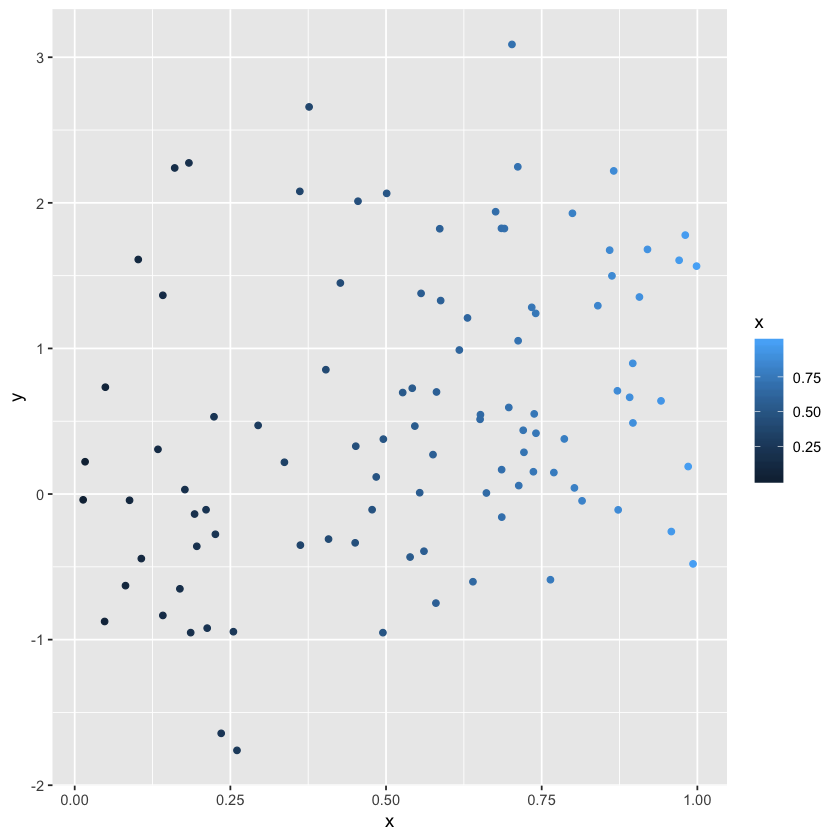

In [27]:
ggplot(df, aes(x,y)) + geom_point(aes(colour = x))

#### Step 3 : Estimate a linear regression model of y on x using the simulated data. Call it model1 in R

In [61]:
model1 <- lm(y ~ x, data = df)

Note that we didnt use the errors. Also I redid this and not exactly sure if it's working

In [62]:
summary(model1)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06780 -0.64255 -0.03511  0.56207  2.86029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.3409     0.1968  -1.733   0.0863 .  
x             1.7394     0.3318   5.242 9.12e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 98 degrees of freedom
Multiple R-squared:  0.219,	Adjusted R-squared:  0.211 
F-statistic: 27.48 on 1 and 98 DF,  p-value: 9.125e-07


#### Step 4 : Draw, in red, the line of the predictions from model1 on the scatterplot of data. (This is the same as the regression line

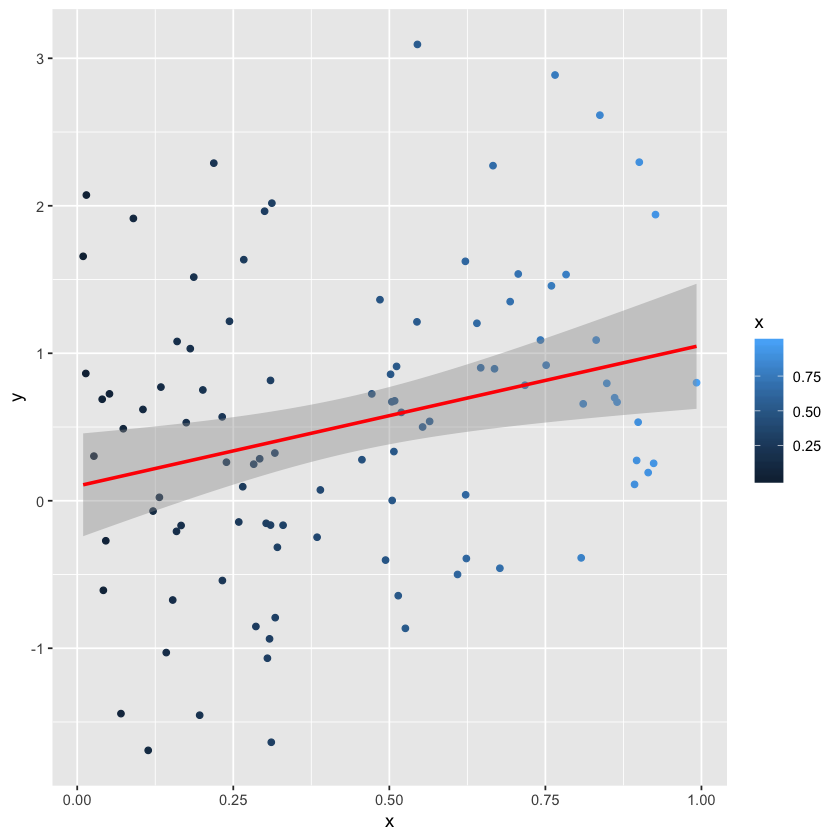

In [186]:
ggplot(df, aes(x,y)) + geom_point(aes(colour = x)) + geom_smooth(method='lm',formula=y~x, col="red")


## THERES A WEIRD INCONSISTENCY BETWEEN THE INTERCEPT AND WHAT THE MODEL SAYS 

#### Step 5 : Let (βˆ0,βˆ1) be the estimated coefficients in model1. Are they exactly equal to the true coefficients (β0, β1)?

No they aren't

#### Step 6 : Compute the difference d = |βˆ1 − β1|. Is this difference the bias? Why/Why not?

In [4]:
beta_hat <- 1.0516
beta <- 2
abs(beta_hat - beta)

[1] 0.9484

#### I DONT KNOW ANY ECONOMETRICS HELP ME

#### Step 7 : Simulate again independant draws of (x, y) (like in step 1) for 1000, 5000, 10000 and 1e6 observations. Estimate a linear regression model of y on x using the simulated data each time (like in step 3). Compute d = |βˆ1 − β1| (like in step 6) each time and store the values in R.

In [68]:
run_linear_regression <- function(sample_size) {
    x_sample <- sample_uniform_distribution(sample_size)
    error_sample <- sample_normal_distribution(sample_size)
    df <- create_regression_dataframe(x_sample, error_sample)
    model <- lm(y ~ x, data = df)
    summary(model)
}

In [ ]:
run_linear_regression(10000000)

In [55]:
x_sample_1000 <- sample_uniform_distribution(1000)

In [56]:
error_sample_1000 <- sample_normal_distribution(1000)

In [57]:
df_1000 <- create_regression_dataframe(x_sample_1000, error_sample_1000)
df_1000

y,x,error
0.75366975,0.27772611,0.47594364
0.55065249,0.04795498,0.50269751
-0.02924781,0.11992444,-0.14917225
-2.08217226,0.31977437,-2.40194662
-0.13252079,0.34563959,-0.47816038
0.24263424,0.23065135,0.01198289
-0.65887249,0.97948226,-1.63835474
0.24748667,0.47536848,-0.22788181
0.83380869,0.41855420,0.41525449
1.86641661,0.52668700,1.33972961


In [64]:
model1000 <- lm(y ~ x, data = df_1000)
summary(model1000)


Call:
lm(formula = y ~ x, data = df_1000)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2870 -0.6653 -0.0271  0.6720  3.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03676    0.06483   0.567    0.571    
x            1.01835    0.11153   9.131   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 998 degrees of freedom
Multiple R-squared:  0.0771,	Adjusted R-squared:  0.07617 
F-statistic: 83.37 on 1 and 998 DF,  p-value: < 2.2e-16


In [58]:
x_sample_5000 <- sample_uniform_distribution(5000)
error_sample_5000 <- sample_uniform_distribution(5000)

In [59]:
df_5000 <- create_regression_dataframe(x_sample_1000, error_sample_1000)
df_5000

y,x,error
0.75366975,0.27772611,0.47594364
0.55065249,0.04795498,0.50269751
-0.02924781,0.11992444,-0.14917225
-2.08217226,0.31977437,-2.40194662
-0.13252079,0.34563959,-0.47816038
0.24263424,0.23065135,0.01198289
-0.65887249,0.97948226,-1.63835474
0.24748667,0.47536848,-0.22788181
0.83380869,0.41855420,0.41525449
1.86641661,0.52668700,1.33972961


In [65]:
model5000 <- lm(y ~ x, data = df_5000)
summary(model5000)


Call:
lm(formula = y ~ x, data = df_5000)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2870 -0.6653 -0.0271  0.6720  3.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03676    0.06483   0.567    0.571    
x            1.01835    0.11153   9.131   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 998 degrees of freedom
Multiple R-squared:  0.0771,	Adjusted R-squared:  0.07617 
F-statistic: 83.37 on 1 and 998 DF,  p-value: < 2.2e-16


In [ ]:
x_sample_10000 <- sample_uniform_distribution(10000)
error_sample_10000 <- sample_normal_distribution(10000)

In [60]:
df_10000 <- create_regression_dataframe(x_sample_1000, error_sample_10000)
df_10000

y,x,error
1.036511143,0.27772611,0.75878503
-0.511070659,0.04795498,-0.55902564
0.051012631,0.11992444,-0.06891181
0.812503525,0.31977437,0.49272916
1.466751999,0.34563959,1.12111241
-0.122654750,0.23065135,-0.35330610
0.539733895,0.97948226,-0.43974836
0.421988498,0.47536848,-0.05337998
1.612273738,0.41855420,1.19371954
-0.577790334,0.52668700,-1.10447734


In [66]:
model10000 <- lm(y ~ x, data = df_10000)
summary(model10000)


Call:
lm(formula = y ~ x, data = df_10000)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6383 -0.6686 -0.0047  0.6666  3.9830 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02357    0.02024   1.165    0.244    
x            0.99216    0.03482  28.496   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9963 on 9998 degrees of freedom
Multiple R-squared:  0.07512,	Adjusted R-squared:  0.07503 
F-statistic:   812 on 1 and 9998 DF,  p-value: < 2.2e-16
